In [1]:
### Importing the packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('C:/Data Science/24 july/Students.csv')

In [3]:
df.head(3)

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


In [4]:
def preprocessing(df):
    columns=df.shape[1]
    print('Total numbers of columns are : ',columns)
    rows=df.shape[0]
    print('Total number of rows are : ', rows)
    missing_num=df.isnull().sum()
    print('Total missing values are : \n',missing_num)
    duplicates=df.duplicated().sum()
    print('Total Number of duplicates are : ',duplicates)
    data_types=df.dtypes
    print('Data types are :\n',data_types)
    return(df)

In [5]:
preprocessing(df)

Total numbers of columns are :  3
Total number of rows are :  100
Total missing values are : 
 JEEPRE      0
JEEMAINS    0
STATUS      0
dtype: int64
Total Number of duplicates are :  0
Data types are :
 JEEPRE      float64
JEEMAINS    float64
STATUS        int64
dtype: object


,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [6]:
###### EDA --- Exploratory Data Analysis

In [7]:
df['JEEPRE'].mean(),df['JEEMAINS'].mean()

(65.64427405779999, 66.22199808840003)

In [8]:
df['JEEPRE'].median(),df['JEEMAINS'].median()

(67.03298802, 67.682381325)

In [9]:
df['JEEPRE'].std(),df['JEEMAINS'].std()

(19.458222275290062, 18.582783039160837)

In [10]:
df['JEEPRE'].max(),df['JEEMAINS'].max()

(99.8278578, 98.86943574)

In [11]:
df['JEEPRE'].min(),df['JEEMAINS'].min()

(30.05882245, 30.60326323)

In [12]:
df['JEEPRE'].skew(),df['JEEMAINS'].skew()

(-0.09556530744039, 0.06500698697595717)

In [13]:
df['JEEPRE'].kurtosis(),df['JEEMAINS'].kurtosis()

(-0.977444256318718, -1.188390756307714)

In [14]:
### outlier analysis

<AxesSubplot:>

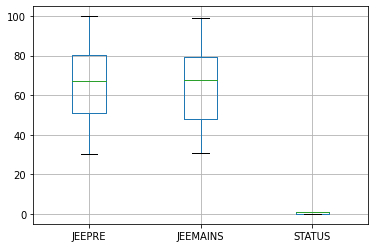

In [15]:
df.boxplot()

<AxesSubplot:>

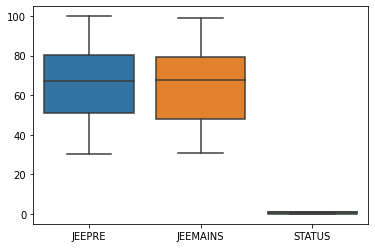

In [16]:
sns.boxplot(data=df)

(array([[<AxesSubplot:title={'center':'JEEPRE'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'JEEMAINS'}>]], dtype=object))

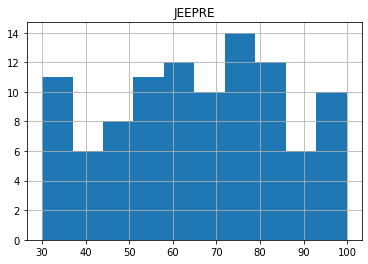

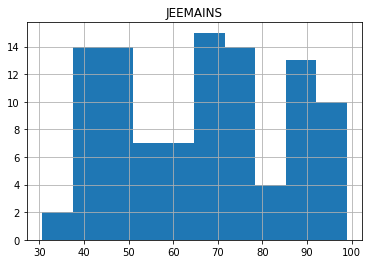

In [17]:
df.hist('JEEPRE'),df.hist('JEEMAINS')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

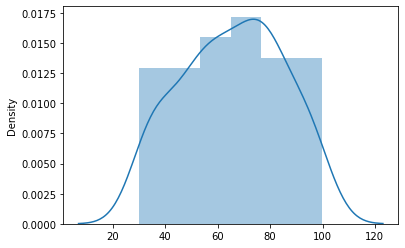

In [18]:
sns.distplot(df,x=df['JEEPRE'],)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

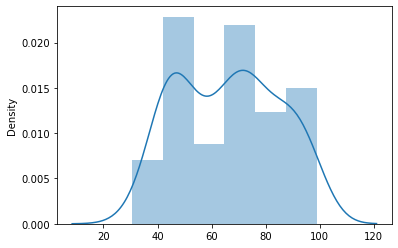

In [19]:
sns.distplot(df,x=df['JEEMAINS'])

In [20]:
### from above we found  that the dataset is normally distributted as skew found near to zero 
### (-0.09556530744039 & 0.06500698697595717)
### also we found that there is no outlier present in dataset
### so we can use standardscalar for scaling in feature enginnering
### as dataset is small(100, 3), we dont use train_test_split

In [21]:
##### feature Engineering

In [22]:
X=df[['JEEPRE','JEEMAINS']]
y=df['STATUS']

In [23]:
scalar=StandardScaler()

In [24]:
X_scaled=scalar.fit_transform(X)

In [25]:
##### model building

In [26]:
def logistic_reg(X,y):
    model=LogisticRegression()
    model_train=model.fit(X,y)
    pred=model_train.predict(X)
    return pred

In [27]:
logistic_reg(X_scaled,y)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [28]:
df_=pd.DataFrame({'ACTUAL': df['STATUS'],'PREDICTED':logistic_reg(X_scaled,y)})
df_

,ACTUAL,PREDICTED
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,1,0


In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [30]:
cf1=confusion_matrix(y,logistic_reg(X_scaled,y))

In [31]:
cf1

array([[34,  6],
       [ 5, 55]], dtype=int64)

<AxesSubplot:>

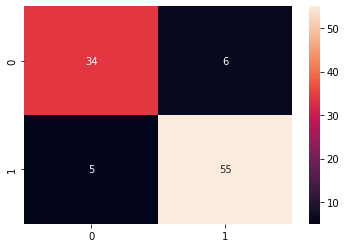

In [32]:
sns.heatmap(cf1,annot=True)

In [33]:
accuracy_score(y,logistic_reg(X_scaled,y))

0.89

In [34]:
error=1-accuracy_score(y,logistic_reg(X_scaled,y))
error

0.10999999999999999

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
def decision_tree(x,y):
    model=DecisionTreeClassifier()
    model_train=model.fit(x,y)
    pred=model_train.predict(x)
    return pred

In [37]:
decision_tree(X_scaled,y)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
cf2=confusion_matrix(y,decision_tree(X_scaled,y))
cf2

array([[40,  0],
       [ 0, 60]], dtype=int64)

<AxesSubplot:>

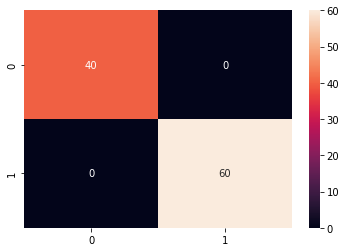

In [39]:
sns.heatmap(cf2,annot=True)

In [40]:
accuracy_score(y,decision_tree(X_scaled,y))

1.0

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
def random_forest(x,y):
    model=RandomForestClassifier()
    model_train=model.fit(x,y)
    pred=model_train.predict(x)
    return pred

In [43]:
random_forest(X_scaled,y)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
cf3=confusion_matrix(y,random_forest(X_scaled,y))
cf3

array([[40,  0],
       [ 0, 60]], dtype=int64)

<AxesSubplot:>

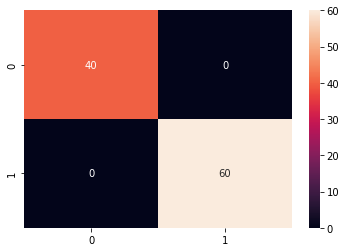

In [45]:
sns.heatmap(cf3,annot=True)

In [46]:
accuracy_score(y,random_forest(X_scaled,y))

1.0

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
def KNN_class(x,y):
    model=KNeighborsClassifier(n_neighbors=3,)
    model_train=model.fit(x,y)
    pred=model_train.predict(x)
    return pred

In [49]:
KNN_class(X_scaled,y)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
cf4=confusion_matrix(y,KNN_class(X_scaled,y))
cf4

array([[39,  1],
       [ 4, 56]], dtype=int64)

<AxesSubplot:>

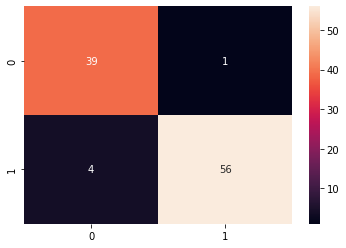

In [51]:
sns.heatmap(cf4,annot=True)

In [52]:
accuracy_score(y,KNN_class(X_scaled,y))

0.95

In [53]:
#### from logistic Regression we get accuracy of -----0.89
#### from Decision Tree we get accuracy of -----1.00
#### from Random Forest we get accuracy of -----1.00
#### from KNN Classification we get accuracy of -----0.95